In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.metrics import classification_report, confusion_matrix


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


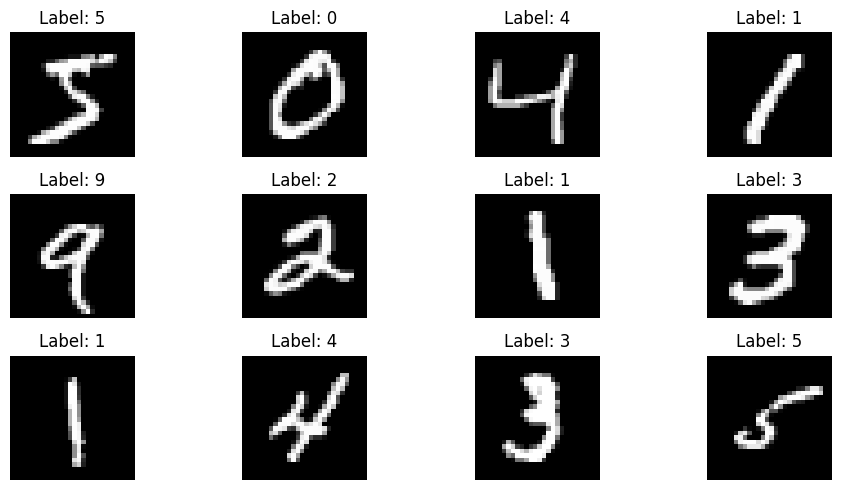

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

plt.figure(figsize=(10, 5))
for i in range(12):
    plt.subplot(3, 4, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
x_train = x_train / 255.0
x_test = x_test / 255.0

x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

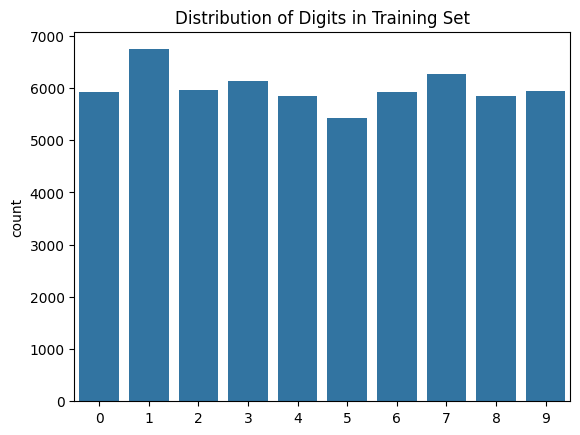

In [ ]:
sns.countplot(x=y_train)
plt.title("Distribution of Digits in Training Set")
plt.show()


In [ ]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(x_train, y_train_cat, epochs=5, validation_data=(x_test, y_test_cat))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 57s 31ms/step - accuracy: 0.9628 - loss: 0.1245 - val_accuracy: 0.9751 - val_loss: 0.0818
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 30ms/step - accuracy: 0.9715 - loss: 0.0928 - val_accuracy: 0.9751 - val_loss: 0.0755
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 29ms/step - accuracy: 0.9743 - loss: 0.0823 - val_accuracy: 0.9770 - val_loss: 0.0726
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 29ms/step - accuracy: 0.9799 - loss: 0.0672 - val_accuracy: 0.9789 - val_loss: 0.0672
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 30ms/step - accuracy: 0.9818 - loss: 0.0596 - val_accuracy: 0.9829 - val_loss: 0.0551


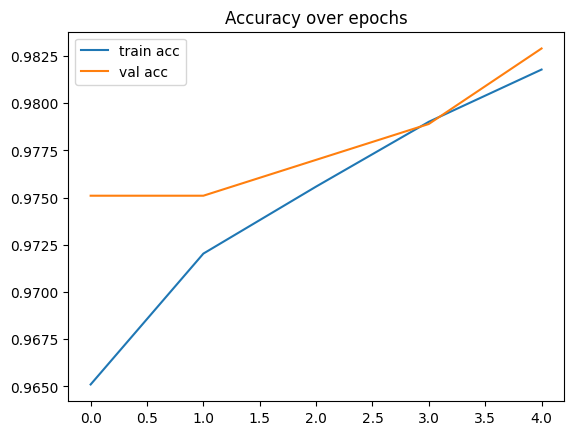

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step


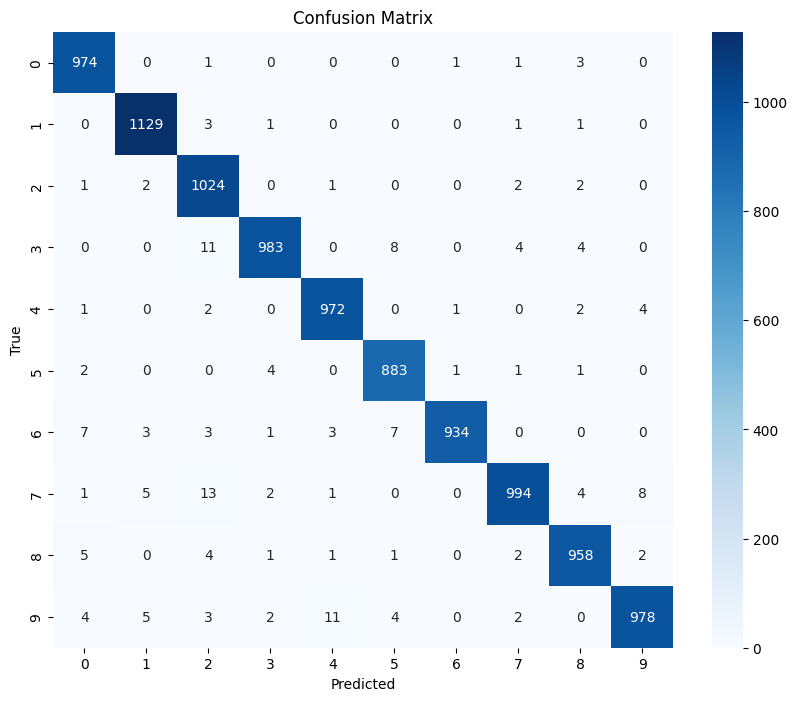

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.99      0.98      1032
           3       0.99      0.97      0.98      1010
           4       0.98      0.99      0.99       982
           5       0.98      0.99      0.98       892
           6       1.00      0.97      0.99       958
           7       0.99      0.97      0.98      1028
           8       0.98      0.98      0.98       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [ ]:
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.title('Accuracy over epochs')
plt.legend()
plt.show()

y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

conf_matrix = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(10,8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

print(classification_report(y_test, y_pred_classes))

In [ ]:
pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 64.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 111.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.4 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
import streamlit as st
from PIL import Image, ImageOps
import os

@st.cache_resource
def train_and_save_model():
    (x_train, y_train), (x_test, y_test) = mnist.load_data()

    x_train = x_train / 255.0
    x_test = x_test / 255.0
    x_train = x_train.reshape(-1, 28, 28, 1)
    x_test = x_test.reshape(-1, 28, 28, 1)

    y_train_cat = to_categorical(y_train)
    y_test_cat = to_categorical(y_test)

    model = Sequential([
        Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
        MaxPooling2D(2,2),
        Conv2D(64, (3,3), activation='relu'),
        MaxPooling2D(2,2),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ])

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    model.fit(x_train, y_train_cat, epochs=3, validation_data=(x_test, y_test_cat))

    model.save("digit_model.h5")
    return model

if os.path.exists("digit_model.h5"):
    model = load_model("digit_model.h5")
else:
    st.write("Training model for the first time...")
    model = train_and_save_model()

st.title("🧠 Handwritten Digit Recognizer")
st.write("Upload a 28x28 image of a handwritten digit (0–9).")

uploaded_file = st.file_uploader("Choose a digit image...", type=["png", "jpg", "jpeg"])

if uploaded_file is not None:
    image = Image.open(uploaded_file).convert('L')
    image = ImageOps.invert(image)
    st.image(image, caption='Uploaded Image', width=150)

    image = image.resize((28, 28))
    img_array = np.array(image) / 255.0
    img_array = img_array.reshape(1, 28, 28, 1)

    prediction = model.predict(img_array)
    predicted_digit = np.argmax(prediction)

    st.subheader(f"Predicted Digit: {predicted_digit}")
    st.write(f"Confidence: {np.max(prediction)*100:.2f}%")



2025-05-12 04:40:55.282 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-12 04:40:55.672 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-05-12 04:40:55.673 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-12 04:40:55.678 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-12 04:40:55.681 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-12 04:40:55.683 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-12 04:40:56.195 Thread 'Thread-9': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-12 04:40:56.197 Thread 'Thread-9': missin

Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 61s 32ms/step - accuracy: 0.9129 - loss: 0.2828 - val_accuracy: 0.9857 - val_loss: 0.0435
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 30ms/step - accuracy: 0.9868 - loss: 0.0434 - val_accuracy: 0.9865 - val_loss: 0.0409
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 29ms/step - accuracy: 0.9910 - loss: 0.0287 - val_accuracy: 0.9909 - val_loss: 0.0271


2025-05-12 04:45:05.009 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-12 04:45:05.011 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-12 04:45:05.012 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-12 04:45:05.013 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-12 04:45:05.014 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-12 04:45:05.016 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-12 04:45:05.018 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-12 04:45:05.019 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar